## Imports

In [1]:
import tensorflow
import numpy
from matplotlib import pyplot
import cv2
import os
import pickle
from sklearn.metrics import confusion_matrix,classification_report
import seaborn
import keras

In [2]:
print(tensorflow.__version__,keras.__version__)

2.10.1 2.10.0


In [3]:
print("Number of GPUs Available: ", len(tensorflow.config.list_physical_devices('GPU')))

Number of GPUs Available:  1


## Configurations

In [4]:
# %matplotlib qt;
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (5, 3)

In [5]:
Training_Data_Path="../Data/Main_Data/"

In [6]:
class_list=os.listdir(Training_Data_Path)

In [7]:
class_list

['anger', 'disgust', 'fear', 'happy', 'sad', 'surprise']

In [8]:
Object_Data_Path="../Data/Preprocessed_Data/"

In [9]:
pickle_training_features=open(Object_Data_Path+"pickle_training_features_for_transfer_learning.pickle","rb")
Training_Features=pickle.load(pickle_training_features)
pickle_training_features.close()
pickle_training_labels=open(Object_Data_Path+"pickle_training_labels_for_transfer_learning.pickle","rb")
Training_Label=pickle.load(pickle_training_labels)
pickle_training_labels.close()

In [10]:
pickle_testing_features=open(Object_Data_Path+"pickle_testing_features_for_transfer_learning.pickle","rb")
Testing_Features=pickle.load(pickle_testing_features)
pickle_testing_features.close()
pickle_testing_labels=open(Object_Data_Path+"pickle_testing_labels_for_transfer_learning.pickle","rb")
Testing_Label=pickle.load(pickle_testing_labels)
pickle_testing_labels.close()

In [11]:
Training_Features.shape

(22191, 224, 224, 3)

In [12]:
# Training_Features[0]

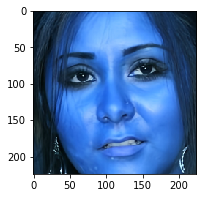

In [13]:
pyplot.imshow(Training_Features[0])

In [14]:
Training_Label[0]

4

In [15]:
class_list[Training_Label[0]]

'sad'

In [16]:
Testing_Features.shape

(500, 224, 224, 3)

In [17]:
# Testing_Features[0]

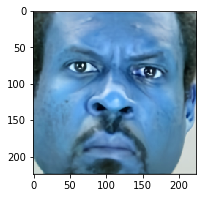

In [18]:
pyplot.imshow(Testing_Features[0])

In [19]:
Testing_Label[0]

0

In [20]:
class_list[Testing_Label[0]]

'anger'

## Praparing Data for Training

In [21]:
Training_Features.shape

(22191, 224, 224, 3)

In [22]:
Testing_Features.shape

(500, 224, 224, 3)

In [23]:
input_dimension=Training_Features[0].shape

In [24]:
input_dimension

(224, 224, 3)

# Model Definition

In [25]:
Model=tensorflow.keras.applications.inception_v3.InceptionV3(input_tensor=keras.layers.Input(shape=(224, 224, 3)))

In [26]:
Model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

## Transfer Learning With RNN and InceptionV3

In [29]:
model_layers[-3].input

[<KerasTensor: shape=(None, 5, 5, 320) dtype=float32 (created by layer 'activation_85')>,
 <KerasTensor: shape=(None, 5, 5, 768) dtype=float32 (created by layer 'mixed9_1')>,
 <KerasTensor: shape=(None, 5, 5, 768) dtype=float32 (created by layer 'concatenate_1')>,
 <KerasTensor: shape=(None, 5, 5, 192) dtype=float32 (created by layer 'activation_93')>]

In [30]:
model_layers=Model.layers
final_layer=keras.layers.MaxPool2D(pool_size=2)(model_layers[-3].output)
final_layer=keras.layers.Reshape((64,128))(final_layer)
final_layer=keras.layers.LSTM(128,return_sequences=True)(final_layer)
final_layer=keras.layers.LSTM(64,return_sequences=True)(final_layer)
final_layer=keras.layers.LSTM(64)(final_layer)
final_layer=keras.layers.Dense(128,activation='relu')(final_layer)
final_layer=keras.layers.Dense(64,activation='relu')(final_layer)
final_layer=keras.layers.Dense(len(class_list),activation='softmax')(final_layer)

In [31]:
Transformed_Model=keras.Model(inputs=model_layers[0].input,outputs=final_layer)

In [ ]:
Transformed_Model.summary(expand_nested=True,show_trainable=True)

In [33]:
Transformed_Model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
)

In [46]:
Transformed_Model.fit(
    Training_Features,Training_Label,
    epochs=2,
    verbose=1,
    validation_data=(Testing_Features,Testing_Label)
)

Epoch 1/2
694/694 [==============================] - 140s 202ms/step - loss: 0.2869 - accuracy: 0.8993 - val_loss: 1.2518 - val_accuracy: 0.6340
Epoch 2/2
694/694 [==============================] - 140s 201ms/step - loss: 0.2582 - accuracy: 0.9108 - val_loss: 1.2801 - val_accuracy: 0.6340


## Evaluation

In [35]:
Testing_Predictions=Transformed_Model.predict(Testing_Features)

16/16 [==============================] - 3s 58ms/step


In [36]:
Testing_Predictions[0]

array([9.79250252e-01, 1.75912045e-02, 6.98358752e-04, 1.05581694e-08,
       2.42839870e-03, 3.17531740e-05], dtype=float32)

In [37]:
numpy.argmax(Testing_Predictions[0])

0

In [38]:
Testing_Label[0]

0

In [39]:
classification_data=confusion_matrix(
    [class_list[i] for i in Testing_Label],
    [class_list[numpy.argmax(prediction)] for prediction in Testing_Predictions]
)

In [40]:
classification_data

array([[33, 18,  5,  0, 18,  7],
       [ 7, 43,  6,  3,  5,  6],
       [ 5,  5, 32,  0,  4, 36],
       [ 0,  1,  2, 96,  0,  1],
       [ 1, 11,  4,  0, 43,  6],
       [ 2,  5,  7,  1,  9, 78]], dtype=int64)

In [41]:
classification_data

array([[33, 18,  5,  0, 18,  7],
       [ 7, 43,  6,  3,  5,  6],
       [ 5,  5, 32,  0,  4, 36],
       [ 0,  1,  2, 96,  0,  1],
       [ 1, 11,  4,  0, 43,  6],
       [ 2,  5,  7,  1,  9, 78]], dtype=int64)

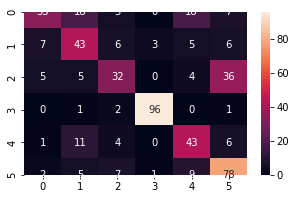

In [42]:
seaborn.heatmap(classification_data,annot=True)

In [43]:
print(classification_report(
    [class_list[i] for i in Testing_Label],
    [class_list[numpy.argmax(prediction)] for prediction in Testing_Predictions]
))

              precision    recall  f1-score   support

       anger       0.69      0.41      0.51        81
     disgust       0.52      0.61      0.56        70
        fear       0.57      0.39      0.46        82
       happy       0.96      0.96      0.96       100
         sad       0.54      0.66      0.60        65
    surprise       0.58      0.76      0.66       102

    accuracy                           0.65       500
   macro avg       0.64      0.63      0.63       500
weighted avg       0.66      0.65      0.64       500



In [44]:
Transformed_Model.save("./Model_Implementation/Models/TransferLearningModelEfficientNetB7.h5")

# Model Saving

In [45]:
Transformed_Model.save("../Model/TransferLearningModelEfficientNetB7.h5")